<a href="https://colab.research.google.com/github/beatrizugalde/Tesina/blob/main/An%C3%A1lisis_de_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('hello')

hello


In [ ]:
import plotly.express as px

In [ ]:
import spacy
import pandas as pd

In [ ]:
df = pd.read_excel("/content/PubMed_resultsx2512_200.xlsx")

In [ ]:
df.head(2)

,PMID,Title,Abstract,Authors,Journal,Keywords,URL,Affiliations
0,39718048,Stomatal Plasticity Maintains Water Potential ...,Vapour pressure deficit (VPD) is a primary det...,"Sharma Kritika, Bourbia Ibrahim, Freeman Jules...","Plant, cell & environment",NaN,https://www.ncbi.nlm.nih.gov/pubmed/39718048,"Biological Sciences, School of Natural Science..."
1,39696657,The microorganisms and metabolome of Pinus rad...,Pollen is a crucial source of nutrients and en...,"Armstrong Charlotte, Ganasamurthy Syaliny, Wig...",Environmental microbiome,NaN,https://www.ncbi.nlm.nih.gov/pubmed/39696657,"Scion, Rotorua, 3010, New Zealand.; Scion, Chr..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PMID          200 non-null    int64 
 1   Title         200 non-null    object
 2   Abstract      199 non-null    object
 3   Authors       200 non-null    object
 4   Journal       200 non-null    object
 5   Keywords      126 non-null    object
 6   URL           200 non-null    object
 7   Affiliations  199 non-null    object
dtypes: int64(1), object(7)
memory usage: 12.6+ KB


In [ ]:
quedar=['PMID','Title','Abstract']
df=df[quedar]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PMID      200 non-null    int64 
 1   Title     200 non-null    object
 2   Abstract  199 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [ ]:
# prompt: genera una lista compilando todos los valores de la columna Title

title_list = df['Title'].tolist()
title_list

['Stomatal Plasticity Maintains Water Potential Homeostasis in Pinus radiata Needles.',
 'The microorganisms and metabolome of Pinus radiata Pollen.',
 'Genome sequence of <i>Bradyrhizobium</i> sp. Ash2021, a free-living <i>Bradyrhizobium</i> species isolated from <i>Pinus radiata</i> forest soil.',
 'A new genus of Australian Agyrtodini from Tasmania (Coleoptera: Leiodidae: Camiarinae).',
 'Iron metabolism acts as a bridge between photosynthesis and red coloration of bud galls induced on Nothofagus obliqua (Nothofagaceae).',
 'Abundance of fecal indicator bacteria and diversity of Escherichia coli associated with poultry farms and pasture land cover in streams of northwestern South Carolina.',
 '[Characteristics of Spatial Distribution of Soil Organic Carbon and Its Seasonal Change of Different Vegetation Buffer Zones in Duliujian River].',
 'Expansion of Pleioblastus amarus in tea plantations significantly enhances the appearance and nutritional composition of bamboo shoots but adver

In [ ]:
title_list

['Stomatal Plasticity Maintains Water Potential Homeostasis in Pinus radiata Needles.',
 'The microorganisms and metabolome of Pinus radiata Pollen.',
 'Genome sequence of <i>Bradyrhizobium</i> sp. Ash2021, a free-living <i>Bradyrhizobium</i> species isolated from <i>Pinus radiata</i> forest soil.',
 'A new genus of Australian Agyrtodini from Tasmania (Coleoptera: Leiodidae: Camiarinae).',
 'Iron metabolism acts as a bridge between photosynthesis and red coloration of bud galls induced on Nothofagus obliqua (Nothofagaceae).',
 'Abundance of fecal indicator bacteria and diversity of Escherichia coli associated with poultry farms and pasture land cover in streams of northwestern South Carolina.',
 '[Characteristics of Spatial Distribution of Soil Organic Carbon and Its Seasonal Change of Different Vegetation Buffer Zones in Duliujian River].',
 'Expansion of Pleioblastus amarus in tea plantations significantly enhances the appearance and nutritional composition of bamboo shoots but adver

In [ ]:
import re

# Patrón para buscar etiquetas HTML, números o el carácter \ufeff
patron =  r'<.*?>|\d|\ufeff|\(|\)|\.|:|-'

# Identificar elementos que coincidan con el patrón
elementos_invalidos = [titulo for titulo in title_list if re.search(patron, titulo)]

print("Elementos inválidos:", elementos_invalidos)


Elementos inválidos: ['Stomatal Plasticity Maintains Water Potential Homeostasis in Pinus radiata Needles.', 'The microorganisms and metabolome of Pinus radiata Pollen.', 'Genome sequence of <i>Bradyrhizobium</i> sp. Ash2021, a free-living <i>Bradyrhizobium</i> species isolated from <i>Pinus radiata</i> forest soil.', 'A new genus of Australian Agyrtodini from Tasmania (Coleoptera: Leiodidae: Camiarinae).', 'Iron metabolism acts as a bridge between photosynthesis and red coloration of bud galls induced on Nothofagus obliqua (Nothofagaceae).', 'Abundance of fecal indicator bacteria and diversity of Escherichia coli associated with poultry farms and pasture land cover in streams of northwestern South Carolina.', '[Characteristics of Spatial Distribution of Soil Organic Carbon and Its Seasonal Change of Different Vegetation Buffer Zones in Duliujian River].', 'Expansion of Pleioblastus amarus in tea plantations significantly enhances the appearance and nutritional composition of bamboo sh

In [ ]:
for e in elementos_invalidos:
  print(e)

Stomatal Plasticity Maintains Water Potential Homeostasis in Pinus radiata Needles.
The microorganisms and metabolome of Pinus radiata Pollen.
Genome sequence of <i>Bradyrhizobium</i> sp. Ash2021, a free-living <i>Bradyrhizobium</i> species isolated from <i>Pinus radiata</i> forest soil.
A new genus of Australian Agyrtodini from Tasmania (Coleoptera: Leiodidae: Camiarinae).
Iron metabolism acts as a bridge between photosynthesis and red coloration of bud galls induced on Nothofagus obliqua (Nothofagaceae).
Abundance of fecal indicator bacteria and diversity of Escherichia coli associated with poultry farms and pasture land cover in streams of northwestern South Carolina.
[Characteristics of Spatial Distribution of Soil Organic Carbon and Its Seasonal Change of Different Vegetation Buffer Zones in Duliujian River].
Expansion of Pleioblastus amarus in tea plantations significantly enhances the appearance and nutritional composition of bamboo shoots but adversely affects palatability.
Enh

In [ ]:
len(elementos_invalidos)

199

In [ ]:
# Identificar elementos inválidos en los títulos
elementos_invalidos = [re.findall(patron, titulo) for titulo in title_list]

# Aplanar la lista de listas y filtrar los resultados
elementos_invalidos_flat = [elemento for sublista in elementos_invalidos for elemento in sublista]



In [ ]:
len(elementos_invalidos_flat)


605

In [ ]:
# Obtener valores únicos
valores_unicos = list(set(elementos_invalidos_flat))

# Imprimir los valores únicos
print("Valores únicos encontrados:")
for valor in valores_unicos:
    print(valor)

Valores únicos encontrados:
1
<sup>
4
7
﻿
2
)
<i>
6
.
<sub>
-
</sup>
</i>
3
5
(
0
8
</sub>
:
9


In [ ]:
len(valores_unicos)

22

In [ ]:
# Patrón para buscar etiquetas HTML, números, BOM, o paréntesis
patron = r'<.*?>|\d|\ufeff|\(|\)|\.|:|-'

# Crear una nueva lista con los títulos "limpios"
titulos_limpios = [re.sub(patron, "", titulo) for titulo in title_list]

# Imprimir los títulos limpios
print("Títulos limpios:")
for titulo in titulos_limpios:
    print(titulo)

Títulos limpios:
Stomatal Plasticity Maintains Water Potential Homeostasis in Pinus radiata Needles
The microorganisms and metabolome of Pinus radiata Pollen
Genome sequence of Bradyrhizobium sp Ash, a freeliving Bradyrhizobium species isolated from Pinus radiata forest soil
A new genus of Australian Agyrtodini from Tasmania Coleoptera Leiodidae Camiarinae
Iron metabolism acts as a bridge between photosynthesis and red coloration of bud galls induced on Nothofagus obliqua Nothofagaceae
Abundance of fecal indicator bacteria and diversity of Escherichia coli associated with poultry farms and pasture land cover in streams of northwestern South Carolina
[Characteristics of Spatial Distribution of Soil Organic Carbon and Its Seasonal Change of Different Vegetation Buffer Zones in Duliujian River]
Expansion of Pleioblastus amarus in tea plantations significantly enhances the appearance and nutritional composition of bamboo shoots but adversely affects palatability
Enhanced rock weathering bo

In [ ]:
# prompt: dejar en minuscula todos los elementos de la lista

# Convertir los títulos limpios a minúsculas
titulos_minusculas = [titulo.lower() for titulo in titulos_limpios]

# Imprimir los títulos en minúsculas
print("Títulos en minúsculas:")
for titulo in titulos_minusculas:
 print(titulo)

Títulos en minúsculas:
stomatal plasticity maintains water potential homeostasis in pinus radiata needles
the microorganisms and metabolome of pinus radiata pollen
genome sequence of bradyrhizobium sp ash, a freeliving bradyrhizobium species isolated from pinus radiata forest soil
a new genus of australian agyrtodini from tasmania coleoptera leiodidae camiarinae
iron metabolism acts as a bridge between photosynthesis and red coloration of bud galls induced on nothofagus obliqua nothofagaceae
abundance of fecal indicator bacteria and diversity of escherichia coli associated with poultry farms and pasture land cover in streams of northwestern south carolina
[characteristics of spatial distribution of soil organic carbon and its seasonal change of different vegetation buffer zones in duliujian river]
expansion of pleioblastus amarus in tea plantations significantly enhances the appearance and nutritional composition of bamboo shoots but adversely affects palatability
enhanced rock weather

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp(titulos_minusculas[0])

In [ ]:
print(doc.text)

stomatal plasticity maintains water potential homeostasis in pinus radiata needles


In [ ]:
for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_

    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

stomatal    ADJ       amod      
plasticity  NOUN      nsubj     
maintains   VERB      ROOT      
water       NOUN      nmod      
potential   ADJ       amod      
homeostasis NOUN      dobj      
in          ADP       prep      
pinus       ADJ       amod      
radiata     NOUN      compound  
needles     NOUN      pobj      


In [ ]:
doc = nlp(titulos_minusculas[5])

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_

    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

abundance   NOUN      ROOT      
of          ADP       prep      
fecal       ADJ       amod      
indicator   NOUN      compound  
bacteria    NOUN      pobj      
and         CCONJ     cc        
diversity   NOUN      conj      
of          ADP       prep      
escherichia PROPN     compound  
coli        PROPN     pobj      
associated  VERB      acl       
with        ADP       prep      
poultry     NOUN      compound  
farms       NOUN      pobj      
and         CCONJ     cc        
pasture     ADJ       amod      
land        NOUN      compound  
cover       NOUN      conj      
in          ADP       prep      
streams     NOUN      pobj      
of          ADP       prep      
northwesternPROPN     amod      
south       PROPN     compound  
carolina    PROPN     pobj      


In [ ]:
doc = nlp(titulos_minusculas[12])

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_

    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

green       ADJ       amod      
synthesis   NOUN      nsubj     
of          ADP       prep      
feo         PROPN     compound  
nanoparticlesNOUN      pobj      
using       VERB      acl       
eucalyptus  NOUN      compound  
globulus    NOUN      compound  
leaf        NOUN      compound  
extract     NOUN      dobj      
on          ADP       prep      
pinus       ADJ       amod      
radiata     NOUN      pobj      
sawdust     NOUN      ROOT      
for         ADP       prep      
cationic    ADJ       amod      
dye         NOUN      compound  
adsorption  NOUN      pobj      


In [ ]:
t = 'Green Synthesis of Fe<sub>2</sub>O<sub>3</sub> Nanoparticles Using <i>Eucalyptus globulus</i> Leaf Extract on <i>Pinus radiata</i> Sawdust for Cationic Dye Adsorption.'
doc = nlp(t)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_

    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

Green       PROPN     compound  
Synthesis   PROPN     ROOT      
of          ADP       prep      
Fe          PROPN     pobj      
<           X         pobj      
sub>2</sub  NOUN      pobj      
>           X         pobj      
O           X         pobj      
<           X         appos     
sub>3</sub  NOUN      appos     
>           X         punct     
NanoparticlesNOUN      nsubj     
Using       VERB      acl       
<           X         dobj      
i           PRON      dobj      
>           X         nmod      
Eucalyptus  PROPN     compound  
globulus</i PROPN     nmod      
>           X         compound  
Leaf        PROPN     compound  
Extract     PROPN     dobj      
on          ADP       prep      
<           X         pobj      
i           PRON      pobj      
>           X         punct     
Pinus       PROPN     nmod      
radiata</i  PROPN     appos     
>           X         appos     
Sawdust     PROPN     ROOT      
for         ADP       prep      
Cationic 

Aquí hay mucho espacio por mejorar, pero de todas formas quiero hacer algunas pruebas.

In [ ]:
#generar un corpus: unir todo en una gran lista
#kmeans al corpus

In [ ]:
import numpy as np


from collections import Counter

In [ ]:



# Convertir a un único string
corpus = ''.join([''.join(sublista) for sublista in titulos_minusculas])

# Imprimir el resultado
print(corpus)


stomatal plasticity maintains water potential homeostasis in pinus radiata needlesthe microorganisms and metabolome of pinus radiata pollengenome sequence of bradyrhizobium sp ash, a freeliving bradyrhizobium species isolated from pinus radiata forest soila new genus of australian agyrtodini from tasmania coleoptera leiodidae camiarinaeiron metabolism acts as a bridge between photosynthesis and red coloration of bud galls induced on nothofagus obliqua nothofagaceaeabundance of fecal indicator bacteria and diversity of escherichia coli associated with poultry farms and pasture land cover in streams of northwestern south carolina[characteristics of spatial distribution of soil organic carbon and its seasonal change of different vegetation buffer zones in duliujian river]expansion of pleioblastus amarus in tea plantations significantly enhances the appearance and nutritional composition of bamboo shoots but adversely affects palatabilityenhanced rock weathering boosts ecosystem multifunct

In [ ]:
doc = nlp(corpus)

In [ ]:
filtered_words_list = []
filtered_words = [token.text for token in doc if token.pos_ in ['NOUN','VERB', 'ADJ','PROPN']]
filtered_words_list.extend(filtered_words)

word_counts = Counter(filtered_words_list).most_common()


# Imprimir las palabras en orden descendente con el número de ocurrencias
for word, count in word_counts:
   if count>1:
    print(f"{word}: {count}")

forest: 40
soil: 31
species: 26
mixed: 23
pinus: 20
forests: 15
carbon: 14
water: 13
new: 12
tree: 12
use: 12
community: 11
radiata: 10
diversity: 10
nothofagus: 9
microbial: 9
using: 9
structure: 9
natural: 9
drought: 8
subtropical: 8
effect: 8
potential: 7
different: 7
ecosystem: 7
functional: 7
environmental: 7
plant: 7
effects: 7
fungal: 7
communities: 7
native: 7
land: 6
south: 6
restoration: 6
nitrogen: 6
southern: 6
temperate: 6
litter: 6
dynamics: 6
bacterial: 6
trees: 6
biodiversity: 6
broadleaved: 6
cover: 5
spatial: 5
distribution: 5
organic: 5
change: 5
composition: 5
eucalyptus: 5
data: 5
factors: 5
pine: 5
quality: 5
climate: 5
impacts: 5
central: 5
description: 5
response: 5
production: 5
vegetation: 4
plantations: 4
networks: 4
tropical: 4
ecological: 4
characterization: 4
leaf: 4
massoniana: 4
beech: 4
influence: 4
afforestation: 4
zealand: 4
wood: 4
novel: 4
stress: 4
responses: 4
fungi: 4
province: 4
plantation: 4
areas: 4
european: 4
patterns: 4
variation: 4
planet:

In [ ]:
print(word_counts)

[('forest', 40), ('soil', 31), ('species', 26), ('mixed', 23), ('pinus', 20), ('forests', 15), ('carbon', 14), ('water', 13), ('new', 12), ('tree', 12), ('use', 12), ('community', 11), ('radiata', 10), ('diversity', 10), ('nothofagus', 9), ('microbial', 9), ('using', 9), ('structure', 9), ('natural', 9), ('drought', 8), ('subtropical', 8), ('effect', 8), ('potential', 7), ('different', 7), ('ecosystem', 7), ('functional', 7), ('environmental', 7), ('plant', 7), ('effects', 7), ('fungal', 7), ('communities', 7), ('native', 7), ('land', 6), ('south', 6), ('restoration', 6), ('nitrogen', 6), ('southern', 6), ('temperate', 6), ('litter', 6), ('dynamics', 6), ('bacterial', 6), ('trees', 6), ('biodiversity', 6), ('broadleaved', 6), ('cover', 5), ('spatial', 5), ('distribution', 5), ('organic', 5), ('change', 5), ('composition', 5), ('eucalyptus', 5), ('data', 5), ('factors', 5), ('pine', 5), ('quality', 5), ('climate', 5), ('impacts', 5), ('central', 5), ('description', 5), ('response', 5), 

In [ ]:
word_counts_df = pd.DataFrame(word_counts, columns=['Word', 'Count'])

In [ ]:
word_counts_df

,Word,Count
0,forest,40
1,soil,31
2,species,26
3,mixed,23
4,pinus,20
...,...,...
1318,mexicoteline,1
1319,monspessulana,1
1320,harm,1
1321,chilean,1


In [ ]:
word_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Word    1323 non-null   object
 1   Count   1323 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.8+ KB


In [ ]:
word_counts_df_filtrado = word_counts_df[word_counts_df['Count'] > 10]

In [ ]:
grafico = px.bar(word_counts_df_filtrado, x='Word', y='Count', title='Word Counts',text_auto=True)
grafico.show()

In [ ]:
import spacy
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer



# 1. Combina las listas en un único corpus
#corpus = [''.join(lst) for lst in titulos_minusculas]



# 3. Tokenización y vectorización
# Usa un vectorizador como TfidfVectorizer para convertir el texto en vectores
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# 4. Aplicar KMeans
kmeans = KMeans(n_clusters=2, random_state=42)  # Puedes cambiar el número de clústeres
kmeans.fit(X)

# 5. Mostrar los resultados
print("Clústeres asignados a cada documento:")
for idx, label in enumerate(kmeans.labels_):
    print(f"Documento {idx + 1}: Clúster {label}")

# Opcional: Para analizar los resultados de KMeans, puedes ver los términos más representativos de cada clúster
# Mostrar los términos más importantes para cada clúster
print("\nTérminos más representativos por clúster:")
terms = vectorizer.get_feature_names_out()
for i in range(kmeans.n_clusters):
    print(f"Clúster {i}:")
    cluster_terms = [terms[idx] for idx in kmeans.cluster_centers_.argsort()[:, ::-1][i, :10]]
    print(", ".join(cluster_terms))


ValueError: Iterable over raw text documents expected, string object received.

In [ ]:
print(corpus)

['stomatal plasticity maintains water potential homeostasis in pinus radiata needles', 'the microorganisms and metabolome of pinus radiata pollen', 'genome sequence of bradyrhizobium sp ash, a freeliving bradyrhizobium species isolated from pinus radiata forest soil', 'a new genus of australian agyrtodini from tasmania coleoptera leiodidae camiarinae', 'iron metabolism acts as a bridge between photosynthesis and red coloration of bud galls induced on nothofagus obliqua nothofagaceae', 'abundance of fecal indicator bacteria and diversity of escherichia coli associated with poultry farms and pasture land cover in streams of northwestern south carolina', '[characteristics of spatial distribution of soil organic carbon and its seasonal change of different vegetation buffer zones in duliujian river]', 'expansion of pleioblastus amarus in tea plantations significantly enhances the appearance and nutritional composition of bamboo shoots but adversely affects palatability', 'enhanced rock weat

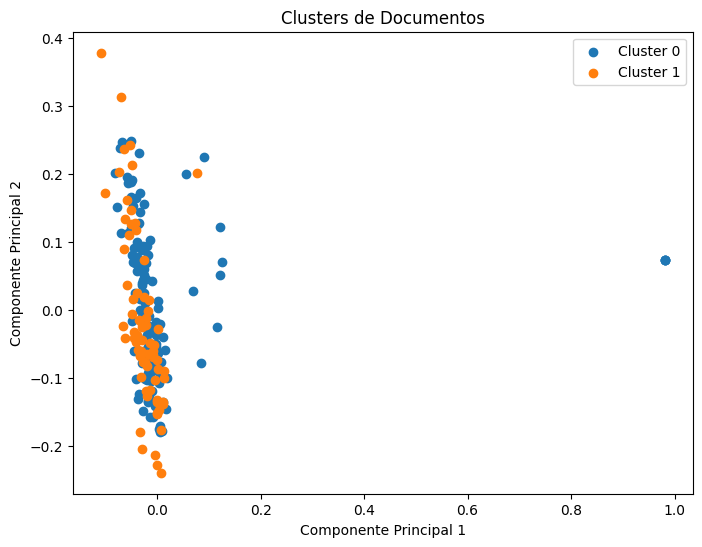


Términos más representativos por clúster:
Clúster 0:
in, the, of, and, forest, to, soil, species, from, fungal
Clúster 1:
of, and, on, the, effect, in, forest, effects, soil, pinus


In [ ]:
# prompt: grafica los clusters

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ... (Your existing code) ...

# 5. Mostrar los resultados
#print("Clústeres asignados a cada documento:")
#for idx, label in enumerate(kmeans.labels_):
#    print(f"Documento {idx + 1}: Clúster {label}")

# Reduce la dimensionalidad de los datos para la visualización (opcional pero recomendado)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Crea el gráfico de dispersión
plt.figure(figsize=(8, 6))
for i in range(kmeans.n_clusters):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i}')

plt.title('Clusters de Documentos')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

# Opcional: Para analizar los resultados de KMeans, puedes ver los términos más representativos de cada clúster
# Mostrar los términos más importantes para cada clúster
print("\nTérminos más representativos por clúster:")
terms = vectorizer.get_feature_names_out()
for i in range(kmeans.n_clusters):
    print(f"Clúster {i}:")
    cluster_terms = [terms[idx] for idx in kmeans.cluster_centers_.argsort()[:, ::-1][i, :10]]
    print(", ".join(cluster_terms))

